## El DataSet contiene información sobre Proveedores y Productos de Carnes con sus precios y Fechas. 

In [1]:
# 1.- Cargamos las Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

### Exploración de Datos

In [2]:
# 2.- Cargamos el DataSet

dfcarnes = pd.read_csv('Carnes.csv')
dfcarnes.head(8)

,proveedor,Categoria,producto,fecha,precio
0,Alta Performance,Carniceria,Asado x Kg.,06/06/2024 14:51:34,7490
1,Alta Performance,Carniceria,Asado x Kg.,07/06/2024 14:28:17,7490
2,Alta Performance,Carniceria,Asado x Kg.,07/06/2024 15:07:42,7490
3,Alta Performance,Carniceria,Asado x Kg.,09/06/2024 15:31:05,7490
4,Alta Performance,Carniceria,Asado x Kg.,10/06/2024 14:38:28,7490
5,Alta Performance,Carniceria,Asado x Kg.,23/05/2024 13:33:03,8290
6,Alta Performance,Carniceria,Asado x Kg.,23/05/2024 13:33:03,8290
7,Alta Performance,Carniceria,Asado x Kg.,28/05/2024 15:29:30,8290


In [3]:
# 3.- Analisis Descriptivo.

dfcarnes.describe(include='all')

,proveedor,Categoria,producto,fecha,precio
count,6558,6558,6558,6558,6558.000000
unique,15,1,38,1096,NaN
top,La Anonima,Carniceria,Matambre x Kg.,11/06/2024 15:37:41,NaN
freq,681,6558,479,38,NaN
mean,NaN,NaN,NaN,NaN,7960.058554
std,NaN,NaN,NaN,NaN,2090.009975
min,NaN,NaN,NaN,NaN,1900.000000
25%,NaN,NaN,NaN,NaN,6500.000000
50%,NaN,NaN,NaN,NaN,7990.000000
75%,NaN,NaN,NaN,NaN,8999.000000


In [4]:
# 4.- Información general del dataset

print(dfcarnes.info())
print(dfcarnes.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   proveedor  6558 non-null   object
 1   Categoria  6558 non-null   object
 2   producto   6558 non-null   object
 3   fecha      6558 non-null   object
 4   precio     6558 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 256.3+ KB
None
(6558, 5)


### Preprocesamiento de Datos

In [5]:
# 5.- Verificar valores nulos y valores duplicados

nulos = dfcarnes.isnull().sum()
duplicados = dfcarnes.duplicated().sum()

# 6.- Eliminación de duplicados

dfcarnes = dfcarnes.drop_duplicates()

nulos, duplicados

(proveedor    0
 Categoria    0
 producto     0
 fecha        0
 precio       0
 dtype: int64,
 120)

In [6]:
# 7- Convertir a solo la fecha (eliminar horas, minutos y segundos)

dfcarnes['fecha'] = pd.to_datetime(dfcarnes['fecha'], format='%d/%m/%Y %H:%M:%S')
dfcarnes['fecha'] = dfcarnes['fecha'].dt.date
dfcarnes.fecha.head()

0    2024-06-06
1    2024-06-07
2    2024-06-07
3    2024-06-09
4    2024-06-10
Name: fecha, dtype: object

In [7]:
# 3b.- Analisis Descriptivo.

dfcarnes.describe(include='all')

,proveedor,Categoria,producto,fecha,precio
count,6438,6438,6438,6438,6438.000000
unique,15,1,38,48,NaN
top,La Anonima,Carniceria,Matambre x Kg.,2024-06-07,NaN
freq,679,6438,469,334,NaN
mean,NaN,NaN,NaN,NaN,7964.095527
std,NaN,NaN,NaN,NaN,2095.320284
min,NaN,NaN,NaN,NaN,1900.000000
25%,NaN,NaN,NaN,NaN,6500.000000
50%,NaN,NaN,NaN,NaN,7990.000000
75%,NaN,NaN,NaN,NaN,8999.000000


In [8]:
# 8- Muestro como queda par ver la columna Fecha

dfcarnes.head(8)

,proveedor,Categoria,producto,fecha,precio
0,Alta Performance,Carniceria,Asado x Kg.,2024-06-06,7490
1,Alta Performance,Carniceria,Asado x Kg.,2024-06-07,7490
2,Alta Performance,Carniceria,Asado x Kg.,2024-06-07,7490
3,Alta Performance,Carniceria,Asado x Kg.,2024-06-09,7490
4,Alta Performance,Carniceria,Asado x Kg.,2024-06-10,7490
5,Alta Performance,Carniceria,Asado x Kg.,2024-05-23,8290
7,Alta Performance,Carniceria,Asado x Kg.,2024-05-28,8290
8,Alta Performance,Carniceria,Asado x Kg.,2024-05-02,9290


## Visualización de Datos

<Figure size 1200x800 with 0 Axes>

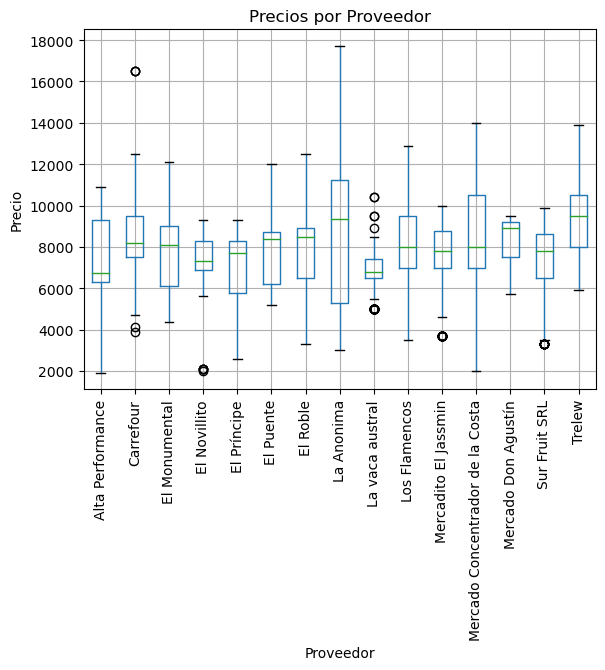

In [9]:
# 9- Boxplot para Visualizar los Precios por Proveedor

plt.figure(figsize=(12, 8))
dfcarnes.boxplot(column='precio', by='proveedor', grid=True, rot=90)
plt.title('Precios por Proveedor')
plt.suptitle('') 
plt.xlabel('Proveedor')
plt.ylabel('Precio')
plt.show()

In [10]:
# 10- Filtro los Datos de un proveedor específico - Ejemplo: Mercado el Jassmin

dfproveedor = dfcarnes[dfcarnes['proveedor'] == 'Mercadito El Jassmin']
dfproveedor.head(8)

,proveedor,Categoria,producto,fecha,precio
326,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-02,7490
327,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-03,7490
328,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-04,7490
329,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-06,7490
330,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-07,7490
331,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-08,7490
332,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-09,7490
333,Mercadito El Jassmin,Carniceria,Asado x Kg.,2024-05-10,7490


<Figure size 1200x800 with 0 Axes>

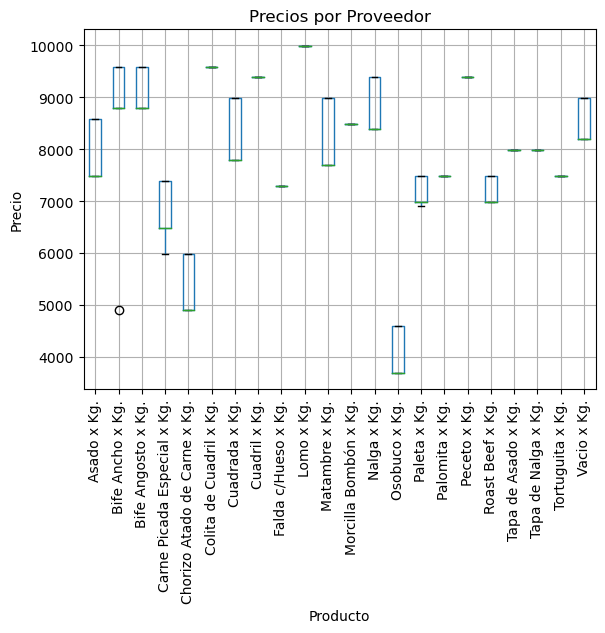

In [11]:
# 11- Boxplot de Precios de los Productos por un Proveedor especifico

plt.figure(figsize=(12, 8))
dfproveedor.boxplot(column='precio', by='producto', grid=True, rot=90)
plt.title('Precios por Proveedor')
plt.suptitle('') 
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.show()

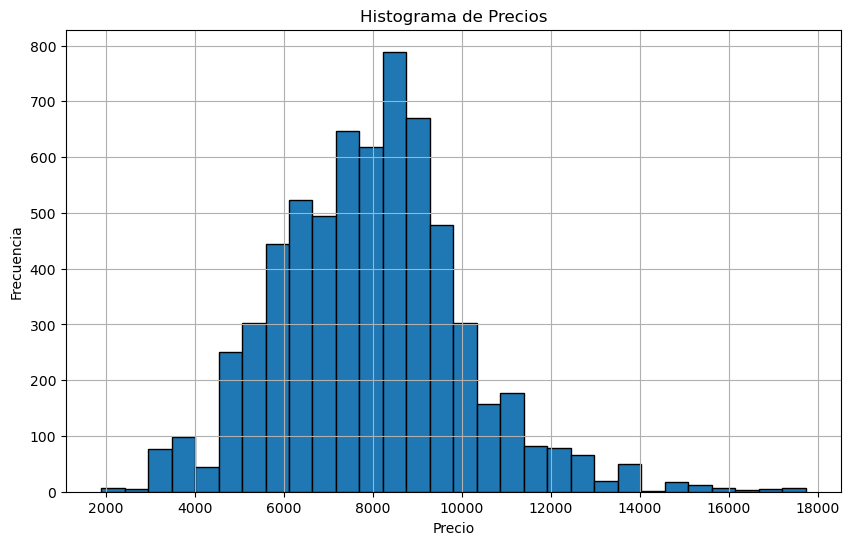

In [12]:
# 12- Histograma de precios de todos los productos

plt.figure(figsize=(10, 6))
plt.hist(dfcarnes['precio'], bins=30, edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [13]:
# 13- Filtrar datos de un producto específico para la serie temporal (ejemplo: 'Asado x Kg.')

dfproveedor_producto = dfcarnes[dfcarnes['proveedor'] == 'Alta Performance']
dfnalga = dfproveedor_producto[dfproveedor_producto['producto'] == 'Asado x Kg.']

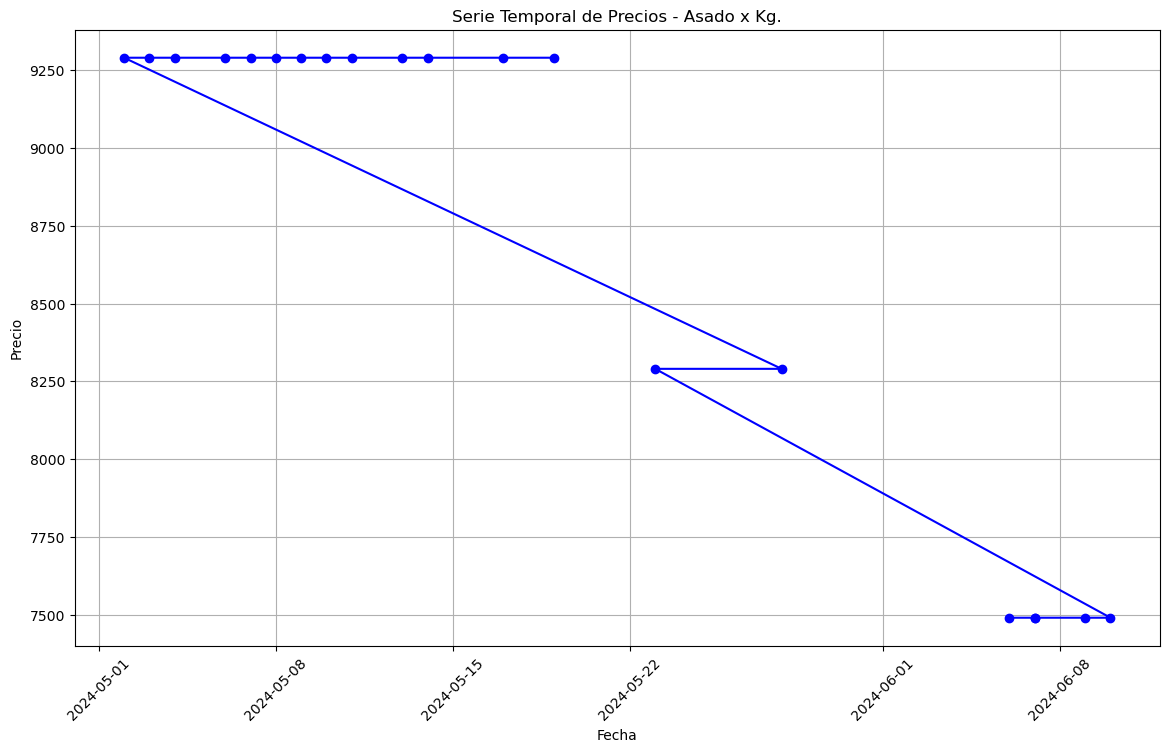

In [14]:
# 14- Serie temporal de precios para 'Asado x Kg.'

plt.figure(figsize=(14, 8))
plt.plot(dfnalga['fecha'], dfnalga['precio'], marker='o', linestyle='-', color='b')
plt.title('Serie Temporal de Precios - Asado x Kg.')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
# 15- Grafico de Dispersion de los Precios de todos sus productos

dfproveedor_productos = dfcarnes[dfcarnes['proveedor'] == 'Trelew']

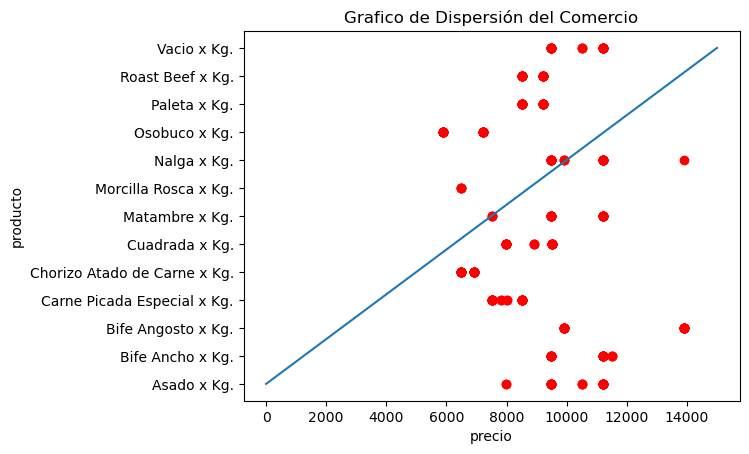

In [16]:
plt.scatter (dfproveedor_productos.precio, dfproveedor_productos.producto, c="red")
x = np.linspace(0, 12, 15000)
plt.plot (x)
plt.xlabel('precio')
plt.ylabel('producto')
plt.title('Grafico de Dispersión del Comercio')
plt.show()

Text(0.5, 1.0, 'Histograma')

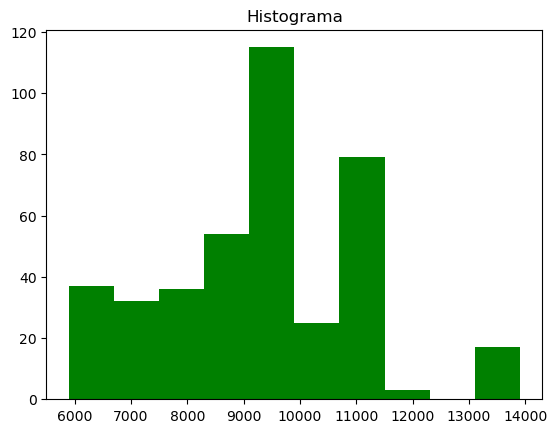

In [17]:
# 16- Histograma que muetra cantidad de productos en cada rango de precios

plt.hist(dfproveedor_productos.precio, color="green")
plt.title('Histograma')

## Modelar y Evaluar los Datos

In [18]:
# 1- Codificación de las variables categóricas

le_proveedor = LabelEncoder()
le_producto = LabelEncoder()
dfcarnes['proveedor_encoded'] = le_proveedor.fit_transform(dfcarnes['proveedor'])
dfcarnes['producto_encoded'] = le_producto.fit_transform(dfcarnes['producto'])

In [19]:
# 2- Selección de características (X) y variable objetivo (y)

X = dfcarnes[['proveedor_encoded', 'producto_encoded']]
y = dfcarnes['precio']
print(X,y)

      proveedor_encoded  producto_encoded
0                     0                 0
1                     0                 0
2                     0                 0
3                     0                 0
4                     0                 0
...                 ...               ...
6552                 14                37
6553                 14                37
6554                 14                37
6555                 14                37
6556                 14                37

[6438 rows x 2 columns] 0        7490
1        7490
2        7490
3        7490
4        7490
        ...  
6552    11200
6553    11200
6554    11200
6555    11200
6556    11200
Name: precio, Length: 6438, dtype: int64


In [20]:
# 3- División de los datos en entrenamiento y prueba

train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Regresión Lineal

In [21]:
# 4- Creo y entreno el modelo de regresión lineal

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
# 5- Predicción con el conjunto de prueba

y_pred_train_l = lin_reg.predict(X_train)
y_pred_test_l = lin_reg.predict(X_test)

In [23]:
# 6- Evaluación del modelo

mae_train = mean_absolute_error(y_train, y_pred_train_l)
mse_train = mean_squared_error(y_train, y_pred_train_l)
r2_train = r2_score(y_train, y_pred_train_l)

mae_test = mean_absolute_error(y_test, y_pred_test_l)
mse_test = mean_squared_error(y_test, y_pred_test_l)
r2_test = r2_score(y_test, y_pred_test_l)

In [25]:
# 8- Información del modelo

print("Error absoluto medio =", round(sm.mean_absolute_error(y_train, y_pred_train_l), 3))
print("Error cuadratico medio =", round(sm.mean_squared_error(y_train, y_pred_train_l), 3))
print("Puntuación R2 =", round(sm.r2_score(y_train, y_pred_train_l), 3))
print("Error absoluto mediano =", round(sm.median_absolute_error(y_train, y_pred_train_l), 3)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_train, y_pred_train_l), 3))
print(" ")
print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_pred_test_l), 3))
print("Error cuadratico medio =", round(sm.mean_squared_error(y_test, y_pred_test_l), 3))
print("Puntuación R2 =", round(sm.r2_score(y_test, y_pred_test_l), 3))
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_pred_test_l), 3)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_pred_test_l), 3))

Error absoluto medio = 1712.984
Error cuadratico medio = 4888211.91
Puntuación R2 = 0.033
Error absoluto mediano = 1400.957
Puntuación de varianza explicada = 0.033
 
Error absoluto medio = 1273.743
Error cuadratico medio = 2914446.95
Puntuación R2 = -0.066
Error absoluto mediano = 933.537
Puntuación de varianza explicada = -0.066


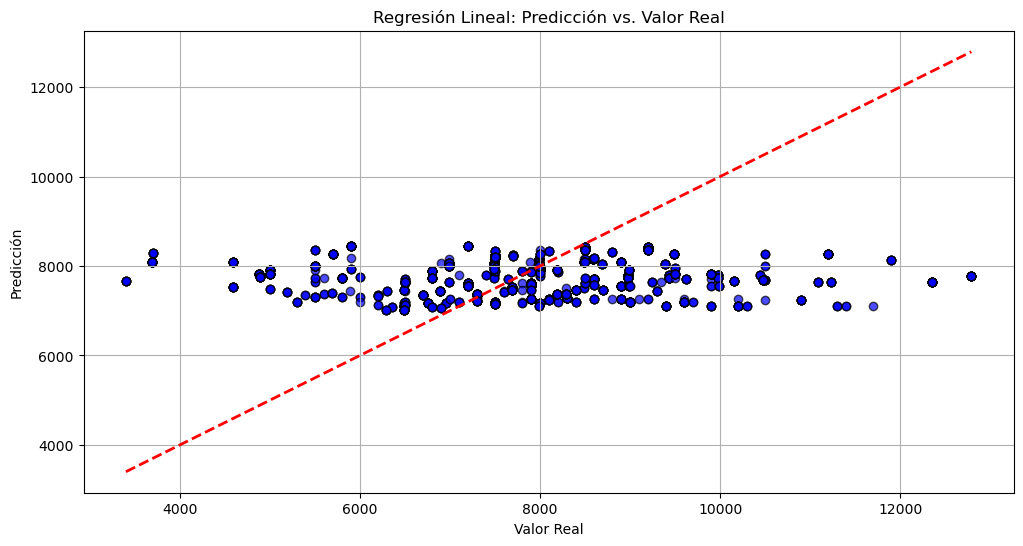

In [26]:
# 7- Gráfico de los resultados

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test_l, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión Lineal: Predicción vs. Valor Real')
plt.grid(True)
plt.show()

## Árboles de Decisión

In [27]:
# 3- División de los datos en entrenamiento y prueba

X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# 4- Creo y entreno el modelo de Árbol de Decisión

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_entrenamiento, Y_entrenamiento)

DecisionTreeRegressor(random_state=42)

In [29]:
# 5- Predicción con el conjunto de prueba

y_pred_ab_b = decision_tree.predict(X_prueba)

In [30]:
# 6- Evaluación del modelo

mae_train_b = mean_absolute_error(Y_prueba, y_pred_ab_b)
mse_train_b = mean_squared_error(Y_prueba, y_pred_ab_b)
r2_train_b = r2_score(Y_prueba, y_pred_ab_b)
median_ae = median_absolute_error(Y_prueba, y_pred_ab_b)
explained_var = explained_variance_score(Y_prueba,y_pred_ab_b)

In [31]:
# 8- Información del modelo

print("Error absoluto medio =", mae_train_b)
print("Error cuadratico medio =", mse_train_b)
print("Puntuación R2 =", r2_train_b)
print("Error error absoluto mediano =", median_ae)
print("Varianza =", explained_var)

Error absoluto medio = 315.1098877915395
Error cuadratico medio = 394529.8967742431
Puntuación R2 = 0.9169035118388641
Error error absoluto mediano = 129.5999999999999
Varianza = 0.917157973130365


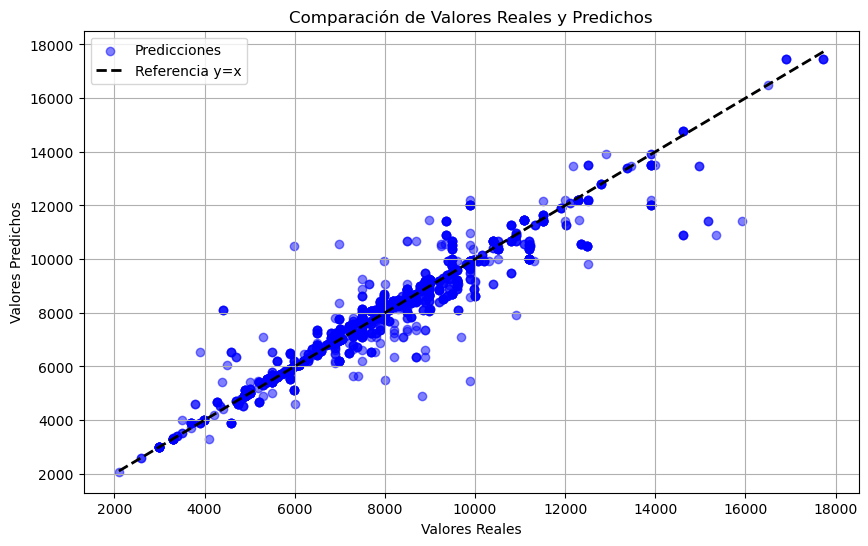

In [32]:
# 7- Gráfico de resultados

plt.figure(figsize=(10, 6))
plt.scatter(Y_prueba, y_pred_ab_b, color='blue', alpha=0.5, label='Predicciones')
plt.plot([Y_prueba.min(), Y_prueba.max()], [Y_prueba.min(), Y_prueba.max()], 'k--', lw=2, label='Referencia y=x')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales y Predichos')
plt.legend()
plt.grid(True)
plt.show()

##### Como conclusión final sobre cómo el modelo abordó el problema formulado inicialmente, el modelo de Árbol de Decisión logró capturar las relaciones no lineales entre las características y el precio de los productos de la Carne, proporcionando predicciones precisas en la mayoría de los casos.